# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import string
import re

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

from nltk.corpus import stopwords
sw = stopwords.words("english")

In [137]:
# Add any additional import statements you need here
import os
import csv
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
import re




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/smsultanmahmudrahat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smsultanmahmudrahat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"
data_location = "/Users/smsultanmahmudrahat/Downloads/department/text_minning_dep/week_2/M1_Results"
# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "/Users/smsultanmahmudrahat/Downloads/department/text_minning_dep/week_2/M1_Results/twitter/"
lyrics_folder = "/Users/smsultanmahmudrahat/Downloads/department/text_minning_dep/week_2/M1_Results/lyrics/"


In [139]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity =   num_unique_tokens / num_tokens if num_tokens > 0 else 0 
    num_characters =   sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [140]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: <!-- Your answer here -->

- Assertion is essential to detecting errors in the early stages of the code. It can help detect problems in the code for the desired variable that may be overlooked and cause issues in deployment. That's why assertion is essential to detecting bugs or getting the desired result before deployment. </br>
- It is documentation for the programmer to know what my team wants from me to code. Sometimes, a product needs an optimized version of code, not a naive one. In that time, they give a time bound inside the assertion. Then, after getting the assertions from the team, the programmer knows what the team expects from him. He delivers an optimized version of the code. The team also maintains the product's quality and expectations by inserting assertation. </br>
- It is also a great tool for debugging. A programmer can detect a line of code and get information about where and what he needs to fix. </br> 




## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [142]:
def load_lyrics(lyrics_folder):
    lyrics_data = {}
    count = 0

    for root, _, files in os.walk(lyrics_folder):
        for file in files:
            if file.endswith('.txt'):
                count += 1
                # Extract the artist and song title from the file name
                parts = file.split('_')
                if len(parts) < 2:
                    print(f"Skipping file due to unexpected name format: {file}")
                    continue  # skip files that don't meet the expected naming convention
                artist = parts[0] 
                song = '_'.join(parts[1:]).replace('.txt', '')
                # read the lyrics from the file
                #print (f"processing file:{file}")
                #print (f"artist:{artist}, Song:{song}")
                
                # read the file name 
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    lyrics = f.read()
                # initialize artist dictionary if not present
                if artist not in lyrics_data:
                    lyrics_data[artist] = {}

                # store lyrics
                lyrics_data[artist][song] = lyrics
                
    print(f"Total files processed: {count}")
    return lyrics_data                

In [143]:
lyrics_folder = "/Users/smsultanmahmudrahat/Downloads/department/text_minning_dep /week_2/M1_Results/lyrics"
lyrics = load_lyrics(lyrics_folder)
# Example usage to print lyrics of a specific song by Cher
#print(lyrics)
print("Lyrics for 'lovekills' by Robyn:")
# a random song from the list of songs by Robyn
print(lyrics['robyn']['lovekills'])

Total files processed: 420
Lyrics for 'lovekills' by Robyn:
"Love Kills"



If you're looking for love
Get a heart made of steel 'cus you know that love kills
Don't go messing with love
It'll hurt you for real, don't you know that love kills

If you're looking for love
Get a heart made of steel 'cus you know that love kills
Don't go messing with love
It'll hurt you for real, don't you know that love kills

Protect yourself, 'cus you'll wreck yourself
In this cold, hard world, so check yourself
You conceal your dreams and you shield yourself
'Til that one kind soul reveals itself

Protect yourself, 'cus you'll wreck yourself
In this cold, hard world, so check yourself
You conceal your dreams and you shield yourself
'Til that one kind soul reveals itself

If you're looking for love
Get a heart made of steel 'cus you know that love kills
Don't go messing with love
It'll hurt you for real, don't you know that love kills

If you're looking for love
Get a heart made of steel 'cus you know th

In [145]:
def load_twitter_descriptions(twitter_folder):
    descriptions = {}
    # Determine the files to process
    files_to_process = [f for f in os.listdir(twitter_folder) if "followers_data.txt" in f]
    print(files_to_process)

    for filename in files_to_process:
        artist = filename.split("_")[0]  # File name starts with the artist's name
        descriptions[artist] = [] 
        
        file_path = os.path.join(twitter_folder, filename)
        
        with open(file_path, "r", encoding="utf-8") as file:
            next(file) # skip the header
            for line in file:
                line = line.replace("\0", "").strip() # remove null characters and strip whitespace 
                if not line: # skip empty lines
                    continue
                parts = line.split("\t") # split the line into parts based on tab character 
                if len(parts) < 7: # skip lines with less than 7 parts
                    continue
                description = parts[6].strip() 
                if description: # add non-empty descriptions
                    descriptions[artist].append(description)
                
    return descriptions


In [146]:
# Specify the folder where the Twitter data is located
twitter_folder = "/Users/smsultanmahmudrahat/Downloads/department/text_minning_dep /week_2/M1_Results/twitter"

# Load descriptions from the files
twitter_descriptions = load_twitter_descriptions(twitter_folder)

# Print the number of descriptions for each artist and sample descriptions
for artist, descs in twitter_descriptions.items():
    print(f"{artist} has {len(descs)} descriptions.")
    for desc in descs[:5]:  # Display the first few descriptions for brevity
        print(desc)
    print("-" * 40)

['cher_followers_data.txt', 'robynkonichiwa_followers_data.txt']
cher has 2001090 descriptions.
𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
csu
Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com
I’m unemployed and live with my parents. MOOPS!
----------------------------------------
robynkonichiwa has 190033 descriptions.
"I love chill" •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…
books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️
(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)
This Twitter profile is full of sarcasm and rants with the occasional moan, dont like me dont follow me! KLF Stan Account Aspiring Youth Council rep
Flora Youssef - Blogger & 

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [147]:
punctuation = set(punctuation) # speeds up comparison 


In [150]:
# create your clean twitter data here
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def clean_and_tokenizer_description (description):
    # remove punctuation except for hashtag
    description = re.sub(r'(\#\w+)', lambda x: x.group(1).replace(' ', ''), description)
    translator = str.maketrans("", "", string.punctuation.replace('#', ''))
    clean_description = description.translate(translator)
    
    # convert to lowercase
    clean_description = clean_description.lower()
    
    # use regex to tokenize the description 
    tokens = re.findall(r'\#\w+|[a-zA-Z0-9]+', clean_description)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    return filtered_tokens 

# Now we will apply cleaning function to twitter data 
def process_twitter_descriptions (twitter_descriptions):
    
    # initiate a dictionary to store cleaned descriptions
    processed_descriptions = {}
    
    for artist, description in twitter_descriptions.items():
        processed_descriptions[artist] = [clean_and_tokenizer_description(desc) for desc in description]
    
    return processed_descriptions




In [151]:

processed_twitter_descriptions = process_twitter_descriptions(twitter_descriptions)

for artist in processed_twitter_descriptions:
    print(f"Sample descriptions for {artist}:")
    
    for description in processed_twitter_descriptions[artist][:5]:
        print(description)
    print ("_" * 40)

Sample descriptions for cher:
[]
['163', '26', 'dm']
['csu']
['writer', 'washinformer', 'spelmancollege', 'alumna', '#dcnative', 'awardwinning', 'journalist', 'pr', 'pro', 'iabc', 'fellow', 'past', 'chair', 'ig', 'bcscomm', 'email', 'wibsilergmailcom']
['unemployed', 'live', 'parents', 'moops']
________________________________________
Sample descriptions for robynkonichiwa:
['love', 'chill', 'facebook', 'instagram', 'soundcloud', 'angelxoarts', 'httpstco447okklkza']
['books', 'movies', 'music', 'nature', 'tv', 'shows', 'og', 'sweetee', 'since', '12', 'thanks', 'youtube', 'recommending', 'feeling', 'homepage']
['amauteur', 'en', 'herbe', 'juriste', 'en', 'paille', 'ami', 'des', 'fleurs', 'sans', 'la', 'main', 'verte', 'music', 'books', '#morecomingsoon', 'si', 'en', 'voit', 'le', 'bout']
['twitter', 'profile', 'full', 'sarcasm', 'rants', 'occasional', 'moan', 'dont', 'like', 'dont', 'follow', 'klf', 'stan', 'account', 'aspiring', 'youth', 'council', 'rep']
['flora', 'youssef', 'blogger'

In [ ]:
# create your clean lyrics data here

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def clean_and_tokenize(lyrics):
    # insert all the punctuations 
    punctuation = set(string.punctuation) 
    # remove punctuation 
    lyrics_clean = "".join(ch for ch in lyrics if ch not in punctuation)
    
    # convert to lowercase
    lyrics_clean = lyrics_clean.lower()
    
    # tokenize lyrics
    lyrics_tokens = word_tokenize(lyrics_clean)
    
    #remove stopwords 
    stop_word = set(stopwords.words('english'))
    
    tokens = [token for token in lyrics_tokens if token not in stop_word]
    
    return tokens 

# now apply the cleaning and tokenizing function to the lyrics data

def process_lyrics_data (lyrics_data):
    processed_lyrics = {}
    
    for artist in lyrics_data:
        # each artist data will be inlcuded in aritst key in processed_lyrics dictionary
        processed_lyrics[artist] = {}
        
        # now iterate through each song in the artist 
        for song, lyrics in lyrics_data[artist].items():
            # clean and tokenize the lyrics
            tokens = clean_and_tokenize(lyrics)
            
            processed_lyrics[artist][song] = tokens
            
    return processed_lyrics

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [72]:
# calls to descriptive_stats of lyrics are

# Load and process the lyrics
lyrics_processed = process_lyrics_data(lyrics)

# Analyze a specific song
tokens = lyrics_processed['robyn']['lovekills']
stats = descriptive_stats(tokens, num_tokens=5, verbose=True)


There are 246 tokens in the data.
There are 42 unique tokens in the data.
There are 1162 characters in the data.
The lexical diversity is 0.171 in the data.


In [104]:
# calls to descriptive_stats of twitter are
def flatten_descriptions (descriptions):
    """ Flatten a list of list of tokens into a single list of tokens"""
    return [token for sublist in descriptions for token in sublist] 
# Applying this to each artist's descriptions 
flattened_descriptions = {artist: flatten_descriptions(descs) for artist, descs in processed_twitter_descriptions.items()}

# calling descriptive_stats on the flattened descriptions
for artist, tokens in flattened_descriptions.items():
    print (f"stats for {artist}")
    descriptive_stats(tokens, num_tokens=5, verbose= True)
    print ("_" * 40)

stats for cher
There are 15745781 tokens in the data.
There are 1497190 unique tokens in the data.
There are 92693619 characters in the data.
The lexical diversity is 0.095 in the data.
________________________________________
stats for robynkonichiwa
There are 1501307 tokens in the data.
There are 249949 unique tokens in the data.
There are 9112424 characters in the data.
The lexical diversity is 0.166 in the data.
________________________________________


In [89]:
len(flattened_descriptions["cher"])

15745781

In [88]:
len(flattened_descriptions["robynkonichiwa"])

1501307

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data when calculating the "top 5 words" in song titles or lyrics, these common words like "the," "and," "is," "in," and "of" would likely dominate the list. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Before analyzing the data, I might have anticipated some differences in lexical diversity between artists like Robyn and Cher, assuming these differences could be influenced by their individual lyrical styles and the musical genres they represent. Lexical diversity is a measure of how many different words are used in a given set of lyrics. Seeing that Robyn has a lexical diversity of 0.166 compared to Cher's 0.095 suggests Robyn uses a wider variety of words in her songs than Cher does. This finding aligns with an expectation that artists might vary in their word choice and complexity based on their artistic and musical approaches



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [79]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [91]:
# top most common emoji 
from collections import Counter
def extract_emoji(text):
    """ extract emoji from text """
    return [char for char in text if char in emoji.EMOJI_DATA]

def count_emoji_by_artist (descriptions): 
    """ count emoji by artist """
    emoji_counts = {}
    for artist, description in descriptions.items():
        all_emoji = [] 
        for desc in description: # each token are filterd in a description
            all_emoji.extend(extract_emoji(desc))
        emoji_counts[artist] = Counter(all_emoji).most_common(10)
    return emoji_counts 

emoji_usage_by_artist = count_emoji_by_artist(processed_twitter_descriptions)

for artist, emoji in emoji_usage_by_artist.items():
    print (f" top emoji for: {artist}")
    for emoji, count in emoji:
        print (f"{emoji} : {count}")
    print ("__"*40)

 top emoji for: cher
❤️ : 14792
🏳️‍🌈 : 14156
♥ : 10178
❤ : 9664
✨ : 8393
🌈 : 5490
🇺🇸 : 3703
💙 : 3693
💜 : 3511
🌊 : 3293
________________________________________________________________________________
 top emoji for: robynkonichiwa
🏳️‍🌈 : 1704
♥ : 1167
❤️ : 990
✨ : 756
❤ : 653
🌈 : 570
🎶 : 273
🖤 : 213
🎧 : 213
💜 : 208
________________________________________________________________________________


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [152]:
# active
def clean_and_tokenize_description(description):
    # remove punctuation except for hashtags
    # first, ensure that hashtags are not broken apart during tokenization
    description = re.sub(r'#(\w+)', r'#\1', description)
    translator = str.maketrans("", "", string.punctuation.replace('#', ''))  # Preserve '#' for hashtags
    clean_description = description.translate(translator)
    
    # Convert to lowercase
    clean_description = clean_description.lower()
    
    # Tokenize the description 
    tokens = re.findall(r'\#\w+|[a-zA-Z0-9]+', clean_description)
    
    # Remove stop words, keeping hashtags intact
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words and not token.startswith('#')]
    
    # Extract and preserve hashtags separately to ensure they are not lost
    hashtags = [token for token in tokens if token.startswith('#')]
    
    return filtered_tokens, hashtags

# Now apply cleaning function to twitter data and extract hashtags
def process_twitter_descriptions(twitter_descriptions):
    processed_descriptions = {}
    hashtags_by_artist = {}

    for artist, descriptions in twitter_descriptions.items():
        processed_descriptions[artist] = []
        all_hashtags = []

        for desc in descriptions:
            tokens, hashtags = clean_and_tokenize_description(desc)
            processed_descriptions[artist].append(tokens)
            all_hashtags.extend(hashtags)

        hashtags_by_artist[artist] = all_hashtags
    
    return processed_descriptions, hashtags_by_artist

# Assuming twitter_descriptions is already filled with your data
processed_twitter_descriptions, hashtags_by_artist = process_twitter_descriptions(twitter_descriptions)

# Analyze hashtag usage
for artist, hashtags in hashtags_by_artist.items():
    print(f"Top hashtags for {artist}:")
    hashtag_count = Counter(hashtags)
    top_hashtags = hashtag_count.most_common(10)
    for hashtag, count in top_hashtags:
        print(f"{hashtag}: {count}")
    print("-" * 40)


Top hashtags for cher:
#resist: 11593
#blm: 10423
#blacklivesmatter: 8151
#theresistance: 3500
#fbr: 3403
#resistance: 3039
#1: 2577
#voteblue: 2300
#lgbtq: 2032
#bidenharris: 1679
----------------------------------------
Top hashtags for robynkonichiwa:
#blacklivesmatter: 602
#blm: 360
#music: 306
#1: 198
#teamfollowback: 134
#edm: 111
#lgbtq: 88
#resist: 85
#art: 72
#love: 72
----------------------------------------


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [182]:
# Your code here

from nltk.corpus import stopwords
title_data ={}
word_count_by_artist = {}
# song tille of the lyrics of each artist 
for artist in lyrics:
    # initialze a list to store the song titles of this artist
    title_data[artist] = [] 
    word_count_by_artist[artist] = Counter()
    for song in lyrics[artist]:
        # song title of the lyrics of each artist
        first_line = lyrics[artist][song].split('\n', 1)[0].strip()
        title = first_line if first_line else song 
        
        # tokenize the title of each song and store it in a list
        # lowercase the words in the title
        tokens = re.findall(r'\b\w+\b', title.lower())
        # remove stop words
        stop_words = set(stopwords.words('english'))
        tokens =[token for token in tokens if token not in stop_words]

        # store the song title of each artist in a list        
        # counting word for each song tile of each artist
        word_count_by_artist[artist].update(tokens)

for artist, counter in word_count_by_artist.items():
    print(f"Top 5 words in song titles for {artist}:")
    for word, count in counter.most_common(5):
        print(f"{word}: {count}")
    print ("_"*50)


Top 5 words in song titles for robyn:
love: 6
u: 4
hang: 3
tell: 3
girl: 3
__________________________________________________
Top 5 words in song titles for cher:
love: 38
man: 15
song: 11
come: 7
one: 7
__________________________________________________


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

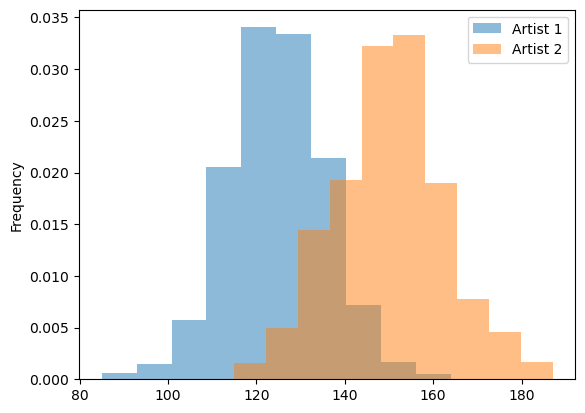

In [169]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression '\s+' is used to match one or more whitespace characters in a text. Whitespace characters include spaces, tabs, new lines, and similar spacing formats. The + sign in the expression means "one or more," so this pattern will find sequences of any length where there are continuous whitespace characters. Lyrics may include extra spaces, tabs, or carriage returns. To accurately count words (tokens), we need to normalize these whitespaces using regular expressions by `'\s+'` 


In [ ]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

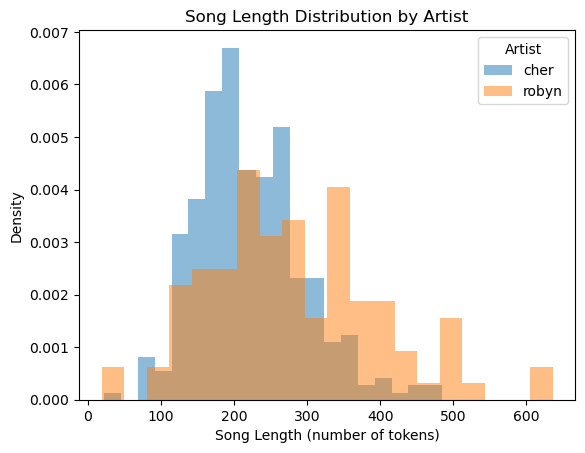

In [181]:
# Your lyric length comparison chart here. 
import pandas as pd 
import matplotlib.pyplot as plt
import re 

def collapse_whitespace(text):
    """ This function will help to reduce whitespace from the text"""
    return re.sub(r'\s+', ' ', text) 

def tokenize (text):
    """ This function will help to tokenize the text on whitespace """ 
    return collapse_whitespace(text).split() 

# 'lyrics' is a dictionary formatted as {'artist': {'song': 'lyrics...'}, ...}
song_lengths = []

for artist, songs in lyrics.items():
    for song, text in songs.items():
        tokens = tokenize(text)
        song_lengths.append({"Artist": artist, "Song Length": len(tokens)})  

df = pd.DataFrame(song_lengths)

# Plotting combined histograms with density=True for probability density
ax = df.groupby('Artist')['Song Length'].plot(kind='hist', density=True, alpha=0.5, legend=True, bins=20)
plt.xlabel('Song Length (number of tokens)')
plt.ylabel('Density')
plt.title('Song Length Distribution by Artist')
plt.legend(title='Artist')
plt.show()
